In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns 
import geopandas as gpd

In [2]:
data=pd.read_csv("train.csv")
test=pd.read_csv("test.csv")
#https://www.kaggle.com/c/petfinder-adoption-prediction/kernels

In [7]:
data.head(5)

,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2


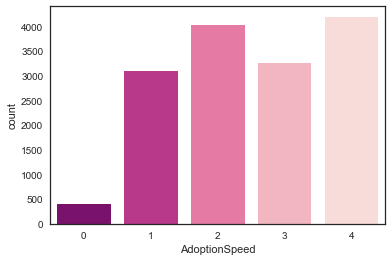

In [15]:
# adoptionspeed
sns.countplot(data['AdoptionSpeed'],palette='RdPu_r')

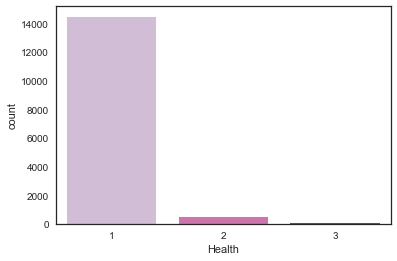

In [8]:
# health
sns.set(style='white')
sns.countplot(data['Health'],palette='PuRd')

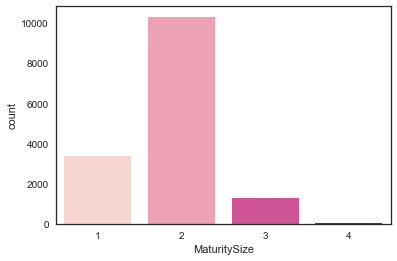

In [9]:
# maturitySize
sns.countplot(data['MaturitySize'],palette='RdPu')

(-0.5, 1199.5, 999.5, -0.5)

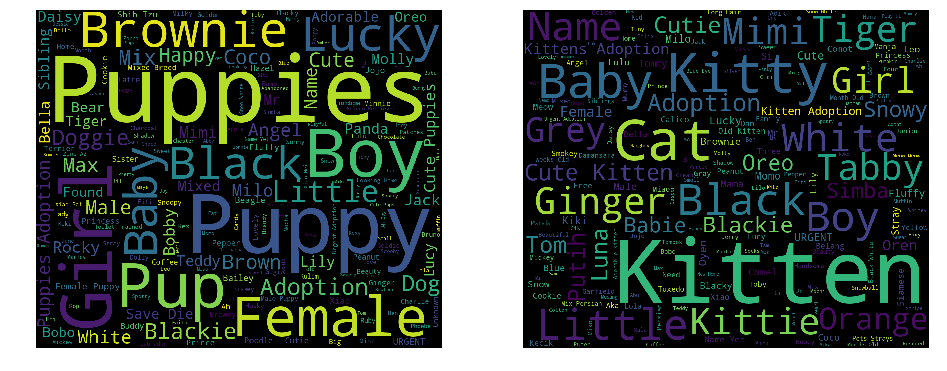

In [10]:
fig, ax = plt.subplots(figsize = (16, 12))
plt.subplot(1, 2, 1)
text_dog = ' '.join(data.loc[data['Type'] == 1, 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='Black',
                      width=1200, height=1000).generate(text_dog)
plt.imshow(wordcloud)
plt.axis("off")

plt.subplot(1, 2, 2)
text_cat = ' '.join(data.loc[data['Type'] == 2, 'Name'].fillna('').values)
wordcloud = WordCloud(max_font_size=None, background_color='Black',
                      width=1200, height=1000).generate(text_cat)
plt.imshow(wordcloud)
plt.axis("off")

/Users/michelle/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


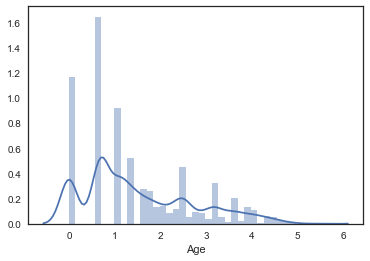

In [14]:
#age
sns.distplot(np.log(data['Age'].replace(0,1)))

/Users/michelle/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


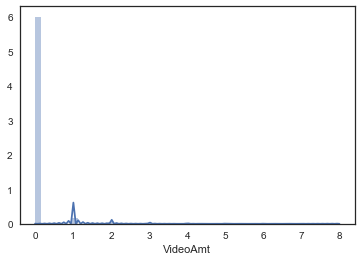

In [11]:
# videoAmt
sns.distplot(data['VideoAmt'])

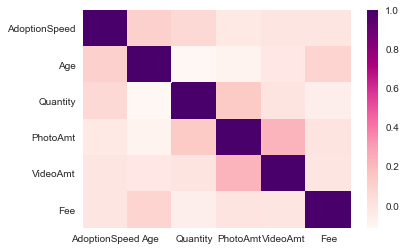

In [12]:
#correlation
sns.heatmap(data[['AdoptionSpeed','Age','Quantity','PhotoAmt','VideoAmt','Fee']].corr(), cmap='RdPu')

/Users/michelle/anaconda3/lib/python3.6/site-packages/matplotlib/colors.py:489: RuntimeWarning: invalid value encountered in less
  np.copyto(xa, -1, where=xa < 0.0)


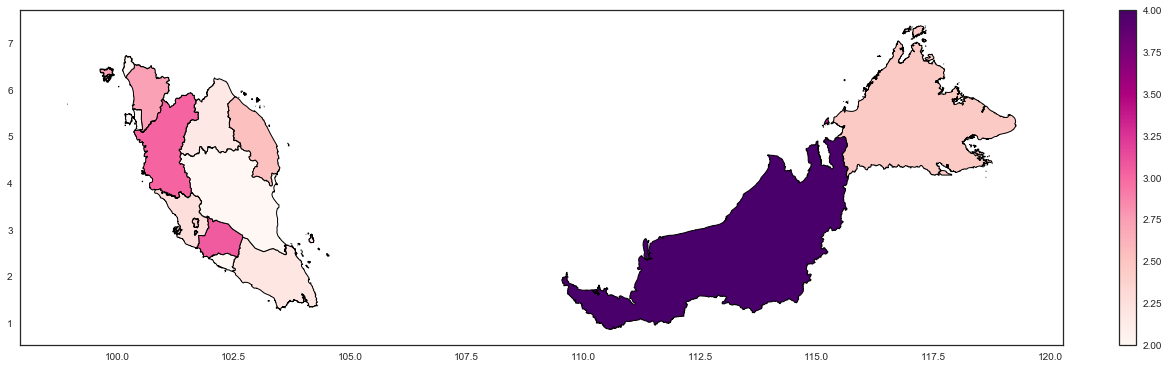

In [13]:
#state
map_df = gpd.read_file('Malaysiapoly1794/Malaysiapoly17.shp')
state=pd.read_csv('state_labels.csv')
ados=pd.DataFrame(data.groupby('State').mean()['AdoptionSpeed']).merge(state,left_on='State',right_on='StateID')
ados.set_index('StateName',inplace=True)
merged=map_df.set_index('name').join(ados)

fig, ax = plt.subplots(1, figsize=(20, 8))
merged.plot(column='AdoptionSpeed', cmap='RdPu', linewidth=1, ax=ax, edgecolor='black')
# ax.axis('off')
sm = plt.cm.ScalarMappable(cmap='RdPu', norm=plt.Normalize(vmin=2, vmax=4))
sm._A = []
cbar = fig.colorbar(sm,fraction=0.015, pad=0.05)

(-1.1104382796960592,
 1.100497108441335,
 -1.1249658537533131,
 1.1117391170345108)

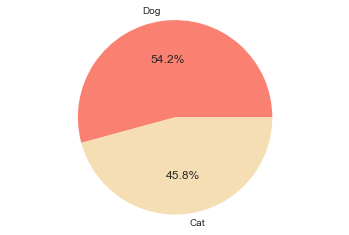

In [17]:
# type
size=data['Type'].value_counts()
labels=['Dog','Cat']
plt.pie(size,labels=labels,autopct='%1.1f%%',colors=['salmon','wheat'])
plt.axis('equal') 

(-1.1143374585181267,
 1.1006827361199107,
 -1.1131776416482253,
 1.11190659760206)

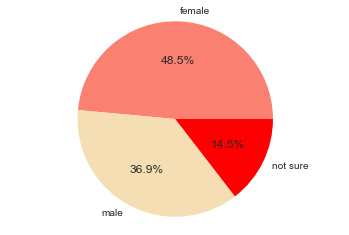

In [21]:
# gender
size=data['Gender'].value_counts()
labels=['female','male','not sure']
plt.pie(size,labels=labels,autopct='%1.1f%%',colors=['salmon','wheat','r'])
plt.axis('equal') 

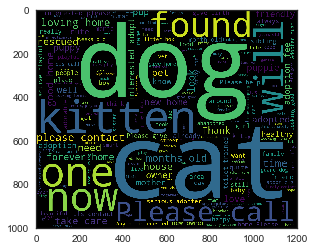

In [27]:
# description
text_description = ' '.join(data['Description'].astype(str))
wordcloud = WordCloud(max_font_size=None, background_color='Black',
                      width=1200, height=1000).generate(text_description)
plt.imshow(wordcloud)